<a href="https://colab.research.google.com/github/Adefunke01/Adefunke01/blob/main/ROAD_SAFETY_UK_DATA_ANALYSIS_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import csv
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import calendar
%matplotlib inline


from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# READING & VIEWING THE DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
accidentdata= pd.read_csv('/content/Road Safety Data - Accidents 2019.csv', dtype={'variable_ID': int})

NameError: ignored

In [ ]:
casualtiesdata = pd.read_csv('/content/Road Safety Data - Casualties 2019.csv',dtype={'variable_ID': int})

In [ ]:
vehiclesdata= pd.read_csv('/content/Road Safety Data- Vehicles 2019.csv',dtype={'variable_ID': int})

In [ ]:
accidentdata.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [ ]:
casualtiesdata.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [ ]:
vehiclesdata.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


# CHECKING FOR MISSING VALUES

In [ ]:
accidentdata.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [ ]:
casualtiesdata.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [ ]:
vehiclesdata.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

#CHECKING DATA TYPES

In [ ]:
accidentdata.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [ ]:
casualtiesdata.dtypes

Accident_Index                        object
Vehicle_Reference                      int64
Casualty_Reference                     int64
Casualty_Class                         int64
Sex_of_Casualty                        int64
Age_of_Casualty                        int64
Age_Band_of_Casualty                   int64
Casualty_Severity                      int64
Pedestrian_Location                    int64
Pedestrian_Movement                    int64
Car_Passenger                          int64
Bus_or_Coach_Passenger                 int64
Pedestrian_Road_Maintenance_Worker     int64
Casualty_Type                          int64
Casualty_Home_Area_Type                int64
Casualty_IMD_Decile                    int64
dtype: object

In [ ]:
vehiclesdata.dtypes

Accident_Index                      object
Vehicle_Reference                    int64
Vehicle_Type                         int64
Towing_and_Articulation              int64
Vehicle_Manoeuvre                    int64
Vehicle_Location-Restricted_Lane     int64
Junction_Location                    int64
Skidding_and_Overturning             int64
Hit_Object_in_Carriageway            int64
Vehicle_Leaving_Carriageway          int64
Hit_Object_off_Carriageway           int64
1st_Point_of_Impact                  int64
Was_Vehicle_Left_Hand_Drive?         int64
Journey_Purpose_of_Driver            int64
Sex_of_Driver                        int64
Age_of_Driver                        int64
Age_Band_of_Driver                   int64
Engine_Capacity_(CC)                 int64
Propulsion_Code                      int64
Age_of_Vehicle                       int64
Driver_IMD_Decile                    int64
Driver_Home_Area_Type                int64
Vehicle_IMD_Decile                   int64
dtype: obje

# DATA PREPROSESSING & CLEANING


# DATA CLEANING
Cleaning data
We start with the accidents data. The date and time are transformed into numpy.datetime64 objects first. Notice that there are 18 observations with time missing (not shown here) and they are "wrongly" parsed; however, this does not have a significant impact as they comprise a very small portion of the observations. There are also some variables with unknown values (different from the missing or out of range values); they are also transformed into NaN. In addition, there exist speed limits of 0 and 10, which were most probably wrongly recorded and are replaced with NaN as well.

Likewise, for the vehicles and casualties data, the unknown values are replaced with NaN. Also, the variables Driver_IMD_Decile and Vehicle_IMD_Decile in the vehicles data contain only NaN, so they are deleted from the vehicles data.

Finally, the three transformed data frames are merged on the Accident_Index and Vehicle_Reference.

In [ ]:
# converting the date and time to datetime format
df['converted_time'] = pd.DatetimeIndex(df['Time'])
df['decimal_time'] = df['converted_time'].dt.hour + df['converted_time'].dt.minute/60

In [ ]:
# accidentdata['Date_Time'] = pd.to_datetime(accidentdata['Date'] + ' ' + accidentdata['Time'], dayfirst=True)
# accidentdata['Month'] = accidentdata['Date_Time'].dt.month
# accidentdata['Day'] =accidentdata['Date_Time'].dt.day
# accidentdata['Hour'] = accidentdata['Date_Time'].dt.hour
# accidentdata['Minute'] = accidentdata['Date_Time'].dt.minute
# accidentdata['Date'] = accidentdata['Date_Time'].dt.date
# accidentdata['Time'] = accidentdata['Date_Time'].dt.time
# accidentdata['Day_of_Week'] = accidentdata['Date_Time'].dt.dayofweek
# accidentdata = accidentdata.replace({'1st_Road_Class': {6: np.nan},
#                          'Road_Type': {9: np.nan},
#                          '2nd_Road_Class': {6: np.nan},
#                          'Weather_Conditions': {9: np.nan},
#                          'Urban_or_Rural_Area': {3: np.nan}})

# accidentdata.loc[accidentdata['Speed_limit'] <= 10, 'Speed_limit'] = np.nan

# vehiclesdata = vehiclesdata.replace({'Journey_Purpose_of_Driver': {6: np.nan},
#                          'Sex_of_Driver': {3: np.nan}})

# vehiclesdata = vehiclesdata.drop(['Driver_IMD_Decile', 'Vehicle_IMD_Decile'], 1)

# casualtiesdata = casualtiesdata.replace({'Pedestrian_Location': {10: np.nan},
#                          'Pedestrian_Movement': {9: np.nan},
#                          'Pedestrian_Road_Maintenance_Worker': {3: np.nan}})

#df = pd.merge(pd.merge(accidentdata, vehiclesdata, 'outer', 'Accident_Index'),
             # casualtiesdata, 'outer', ['Accident_Index', 'Vehicle_Reference'])

#MERGING THE DATA

In [ ]:
from functools import reduce
#df = pd.merge(pd.merge(accidentdata, vehiclesdata, 'outer', 'Accident_Index'),
             # casualtiesdata, 'outer', ['Accident_Index', 'Vehicle_Reference'])
dfs = [accidentdata, casualtiesdata, vehiclesdata]
df = reduce(lambda left,right: pd.merge(left,right,on='Accident_Index'), dfs) # merge the 3 dats with the accident index

In [ ]:
df.isnull().sum()

Accident_Index              0
Location_Easting_OSGR      80
Location_Northing_OSGR     80
Longitude                  80
Latitude                   80
                         ... 
Driver_IMD_Decile           0
Driver_Home_Area_Type       0
Vehicle_IMD_Decile          0
converted_time            113
decimal_time              113
Length: 71, dtype: int64

In [ ]:
# HANDLING MISSING VALUES
def getcleandata(df):
  df['Location_Easting_OSGR'].fillna(method = 'ffill', inplace = True)
  df['Location_Northing_OSGR'].fillna(method = 'ffill', inplace = True)
  df['Longitude'].fillna(method = 'ffill', inplace = True)
  df['Latitude'].fillna(method = 'ffill', inplace = True)
  df['LSOA_of_Accident_Location'].fillna(method = 'ffill', inplace = True)
  df['Time'].replace(np.nan,00.00, inplace = True)
  return df
getcleandata(df)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,converted_time,decimal_time
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,58,9,-1,-1,-1,2,1,2,2022-04-25 17:50:00,17.833333
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,-1,-1,-1,-1,-1,2,1,2,2022-04-25 17:50:00,17.833333
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,58,9,-1,-1,-1,2,1,2,2022-04-25 17:50:00,17.833333
3,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,-1,-1,-1,-1,-1,2,1,2,2022-04-25 17:50:00,17.833333
4,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,58,9,-1,-1,-1,2,1,2,2022-04-25 17:50:00,17.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210435,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,20,4,2198,2,4,5,3,5,2022-04-25 08:46:00,8.766667
210436,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,33,6,1997,2,12,3,2,3,2022-04-25 15:30:00,15.500000
210437,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,61,9,2967,2,5,7,3,7,2022-04-25 15:30:00,15.500000
210438,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,78,11,1597,2,6,8,3,8,2022-04-25 14:10:00,14.166667


In [ ]:
#accidentdata = accidentdata.replace({'1st_Road_Class': {6: np.nan},
#                          'Road_Type': {9: np.nan},
#                          '2nd_Road_Class': {6: np.nan},
#                          'Weather_Conditions': {9: np.nan},
#                          'Urban_or_Rural_Area': {3: np.nan}})

# accidentdata.loc[accidentdata['Speed_limit'] <= 10, 'Speed_limit'] = np.nan

# vehiclesdata = vehiclesdata.replace({'Journey_Purpose_of_Driver': {6: np.nan},
#                          'Sex_of_Driver': {3: np.nan}})

# vehiclesdata = vehiclesdata.drop(['Driver_IMD_Decile', 'Vehicle_IMD_Decile'], 1)

# casualtiesdata = casualtiesdata.replace({'Pedestrian_Location': {10: np.nan},
#                          'Pedestrian_Movement': {9: np.nan},
#                          'Pedestrian_Road_Maintenance_Worker': {3: np.nan}})

In [ ]:
df.isnull().any()#CHECK FOR MISSING VALUES AGAIN

Accident_Index            False
Location_Easting_OSGR     False
Location_Northing_OSGR    False
Longitude                 False
Latitude                  False
                          ...  
Driver_IMD_Decile         False
Driver_Home_Area_Type     False
Vehicle_IMD_Decile        False
converted_time             True
decimal_time               True
Length: 71, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210440 entries, 0 to 210439
Data columns (total 71 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               210440 non-null  object        
 1   Location_Easting_OSGR                        210440 non-null  float64       
 2   Location_Northing_OSGR                       210440 non-null  float64       
 3   Longitude                                    210440 non-null  float64       
 4   Latitude                                     210440 non-null  float64       
 5   Police_Force                                 210440 non-null  int64         
 6   Accident_Severity                            210440 non-null  int64         
 7   Number_of_Vehicles                           210440 non-null  int64         
 8   Number_of_Casualties                         210440 non-null  in

# EXPLORATORY DATA ANALYSIS
Exploring data
The first thing we are interested in exploring is how the number of accidents varies with date and time. We plot five figures of the number of accidents against date, month and day, month, day of week, and hour.

 two peaks can be observed around rush hours, during which traffic congestion is generally at its highest.

# GEOGRAPHICAL AREA vs ACCIDENTS

In [ ]:
## data extraction from dataframe
urban_accidents = len(df[df['Urban_or_Rural_Area'] == 1])
rural_accidents = len(df[df['Urban_or_Rural_Area'] == 2])
other_area_accidents = len(df[df['Urban_or_Rural_Area'] == 3])

In [ ]:
## data fromatting
total_accidents = urban_accidents + rural_accidents + other_area_accidents
urban_percent = urban_accidents / total_accidents * 100
rural_percent = rural_accidents / total_accidents * 100
other_area_percent = other_area_accidents / total_accidents * 100

In [ ]:
# result overview
print("Percentage of accidents occur in urban areas is {0:.0f}%".format(urban_percent))
print("Percentage of accidents occur in rural areas is {0:.0f}%".format(rural_percent))
print("Percentage of accidents occur in other areas is {0:.0f}%".format(other_area_percent))

Percentage of accidents occur in urban areas is 65%
Percentage of accidents occur in rural areas is 35%
Percentage of accidents occur in other areas is 0%


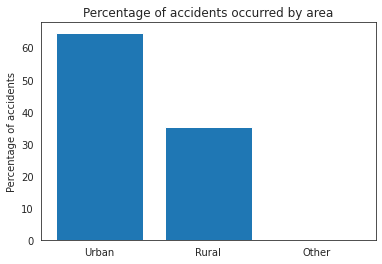

In [ ]:
## result visualization (bar graph)
x = ['Urban', 'Rural', 'Other']
y = [urban_percent, rural_percent, other_area_percent]
x_pos = list(range(len(x)))
plt.bar(x_pos, y)
plt.ylabel('Percentage of accidents')
plt.xticks(x_pos, x)
plt.title("Percentage of accidents occurred by area")
plt.show()

# ACCIDENT SEVERITY

In [ ]:
Acc_Severity1 = len(df[df['Accident_Severity'] == 1])
Acc_Severity2 = len(df[df['Accident_Severity'] == 2])
Acc_Severity3 = len(df[df['Accident_Severity'] == 3])
total = Acc_Severity1 + Acc_Severity2 + Acc_Severity3
As1 = (Acc_Severity1 / total) * 100
As2 = (Acc_Severity2 / total) * 100
As3 = (Acc_Severity3 / total) * 100
print("Percentage of Fatal Accident is {0:.0f}%".format(s1))
print("Percentage of Serious is {0:.0f}%".format(s2))
print("Percentage of Slight  is {0:.0f}%".format(s3))

In [ ]:
## result visualization (bar graph)
x = ['Fatal', 'Serious', 'Slight']
y = [s1, s2, s3]
x_pos = list(range(len(x)))
plt.bar(x_pos, y)
plt.ylabel('Percentage of Accident Severity')
plt.xticks(x_pos, x)
plt.title("Percentage of accidents severity occurred ")
plt.show()

#CASUALTY SEVERITY

In [ ]:
#DATA EXTRACTION
Severity1 = len(df[df['Casualty_Severity'] == 1])
Severity2 = len(df[df['Casualty_Severity'] == 2])
Severity3 = len(df[df['Casualty_Severity'] == 3])
total = Severity1 + Severity2 + Severity3
s1 = (Severity1 / total) * 100
s2 = (Severity2 / total) * 100
s3 = (Severity3 / total) * 100
print("Percentage of Death is {0:.0f}%".format(s1))
print("Percentage of Major Injuries is {0:.0f}%".format(s2))
print("Percentage of Minor Injuires is {0:.0f}%".format(s3))


Percentage of Deaths is 1%
Percentage of Major Injuries is 16%
Percentage of Minor Injuires is 83%


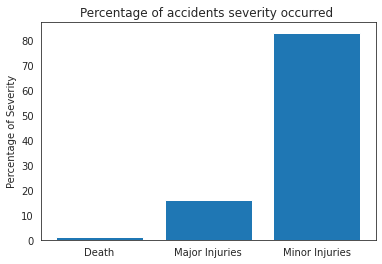

In [ ]:
## result visualization (bar graph)
x = ['Death', 'Major Injuries', 'Minor Injuries']
y = [s1, s2, s3]
x_pos = list(range(len(x)))
plt.bar(x_pos, y)
plt.ylabel('Percentage of Severity')
plt.xticks(x_pos, x)
plt.title("Percentage of accidents severity occurred ")
plt.show()

# ACCIDENTS VS AGE OF THE DRIVER

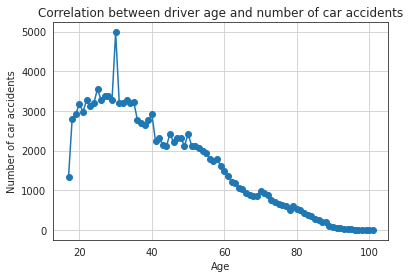

In [ ]:
df["Age_of_Driver"]=df["Age_of_Driver"].astype(int)

age_acci = df[['Accident_Index', 'Age_of_Driver', 'Vehicle_Type']]
age = []
num_of_acci = []
for i in range(17, max(age_acci['Age_of_Driver']) + 1):
    age.append(i)
    num_of_acci.append(len(age_acci[(age_acci['Age_of_Driver'] == i) & (age_acci['Vehicle_Type'] == 9)]))
plt.plot(age, num_of_acci, label='Data', marker='o')
plt.xlabel('Age')
plt.ylabel('Number of car accidents')
plt.title('Correlation between driver age and number of car accidents')
plt.grid(True)
plt.show()

# ACCIDENT VS GENDER

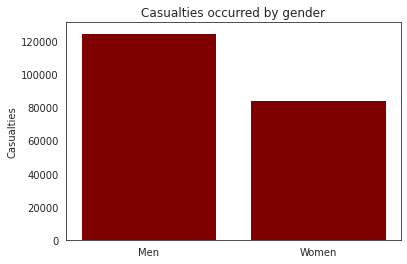

In [ ]:
men = len(df[df['Sex_of_Casualty'] == 1])
women = len(df[df['Sex_of_Casualty'] == 2])
x = ['Men', 'Women']
y = [men, women]
x_pos = list(range(len(x)))
plt.bar(x_pos, y, color='maroon')
plt.ylabel('Casualties')
plt.xticks(x_pos, x)
plt.title("Casualties occurred by gender")
plt.show()

# accident vs age & gender


In [ ]:
df.Sex_of_Driver.value_counts(normalize=True)

1    0.627561
2    0.278811
3    0.093628
Name: Sex_of_Driver, dtype: float64

In [ ]:
# create a new dataframe
drivers = df.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == 3)]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']

# rename the values to be more convenient for the reader resp. viewer
drivers['Sex_of_Driver'] = drivers['Sex_of_Driver'].map({1: 'male', 2: 'female'})
drivers['Age_Band_of_Driver'] = drivers['Age_Band_of_Driver'].map({1: '0 - 5', 2: '6 - 10', 3: '11 - 15',
                                                                   4: '16 - 20', 5: '21 - 25', 6: '26 - 35',
                                                                   7: '36 - 45', 8: '46 - 55', 9: '56 - 65',
                                                                   10: '66 - 75', 11: 'Over 75'})

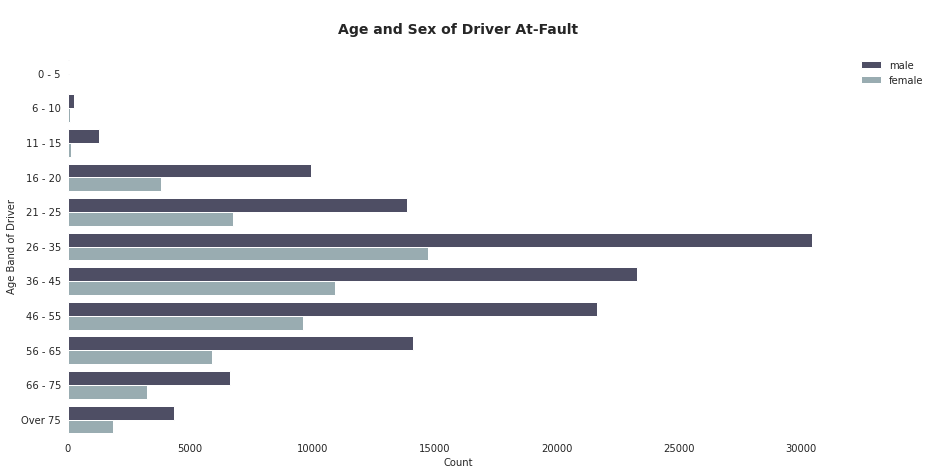

In [ ]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='bone')
ax.set_title('\nAge and Sex of Driver At-Fault\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

Text(0.5, 0, 'Age of Drivers')

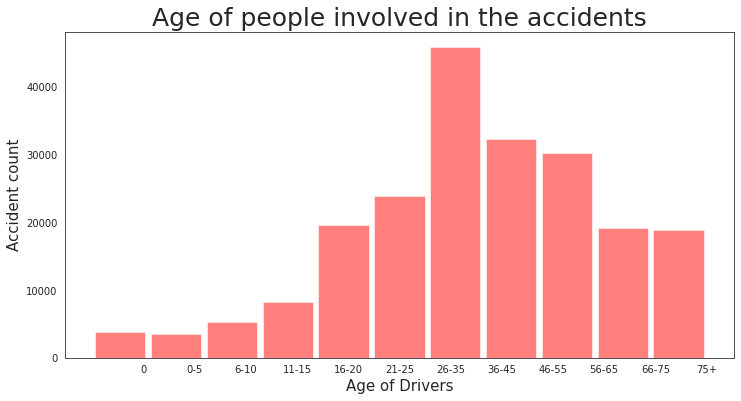

In [ ]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
df.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

# ACCIDENT VS TIME OF THE DAY

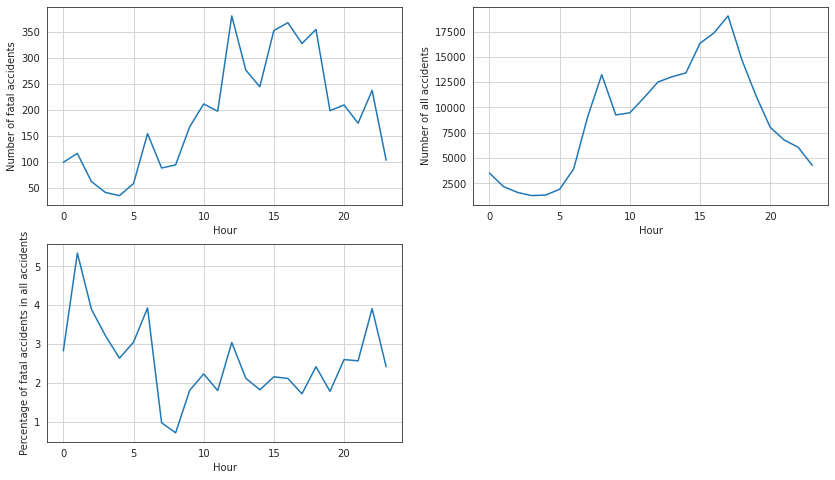

The most dangerous hour to drive, when most fatal accidents happened in all accidents,is 1 o'clock


In [ ]:
df['Hour'] = df['Time'].map(lambda x: str(x).split(':')[0])
df['Hour'] = df['Hour'].apply(pd.to_numeric, errors='coerce')
hour = []
num_of_fatal_accidents = []
num_of_accidents = []
for i in range(24):
    hour.append(i)
    num_of_fatal_accidents_hour = len(df[(df['Accident_Severity'] == 1) & (df['Hour'] == i)])
    num_of_accidents_hour = len(df[df['Hour'] == i])
    num_of_fatal_accidents.append(num_of_fatal_accidents_hour)
    num_of_accidents.append(num_of_accidents_hour)
    normalized_num_of_fatal_accidents = list(np.array(num_of_fatal_accidents) / np.array(num_of_accidents) * 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(221)
ax1.plot(hour, num_of_fatal_accidents)
ax1.set_ylabel('Number of fatal accidents')
ax1.set_xlabel('Hour')
ax1.grid(True)
ax2 = fig.add_subplot(222)
ax2.plot(hour, num_of_accidents)
ax2.set_ylabel('Number of all accidents')
ax2.set_xlabel('Hour')
ax2.grid(True)
ax3 = fig.add_subplot(223)
ax3.plot(hour, normalized_num_of_fatal_accidents)
ax3.set_ylabel('Percentage of fatal accidents in all accidents')
ax3.set_xlabel('Hour')
ax3.grid(True)
plt.show()
print("The most dangerous hour to drive, when most fatal accidents happened in all accidents,is {} o'clock".format(
    normalized_num_of_fatal_accidents.index(max(normalized_num_of_fatal_accidents))))

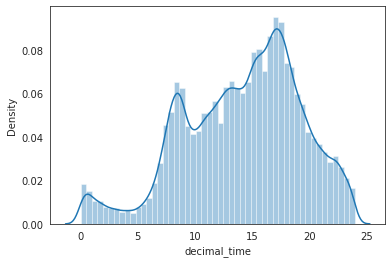

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.distplot(df['decimal_time']);
fig = plt.figure()

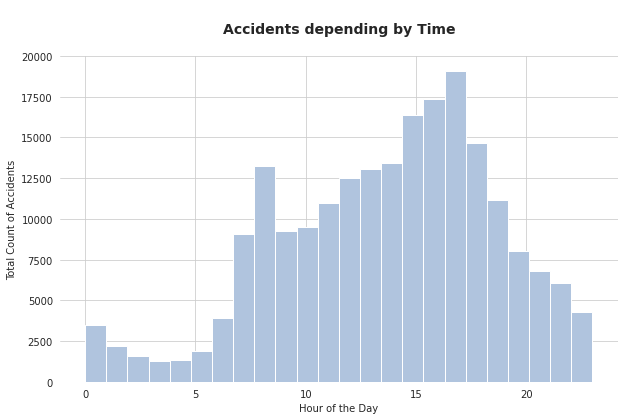

In [ ]:
# prepare plot-BAR
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
df.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents depending by Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

# PENDESTRIANS

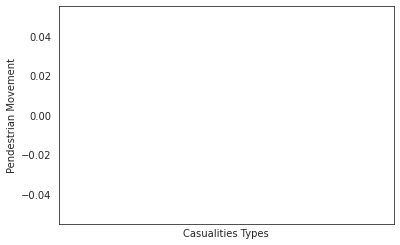

In [ ]:
# casualties_by_pedestrian_movement:  
Pendestrian=df['Casualty_Type']
#casualties_by_pedestrian_movement= casualtiesdata[casualtiesdata.Casualty_Type == 'Pedestrian'].Pedestrian_Movement.groupby([casualtiesdata.Pedestrian_Movement]).count().sort_values()
sns.countplot(df, x=Pendestrian)
# graph the data
# plt.bar(casualties_by_pedestrian_movement.index, casualties_by_pedestrian_movement.values)
# plt.xticks(casualties_by_pedestrian_movement.index)
plt.xlabel('Casualities Types')
plt.ylabel('Accident Count')
plt.title('Pendestrians Involved in Accidents')
# plt.show()

# MOTOBIKES

# ACCIDENTS VS DAY OF THE WEEK

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

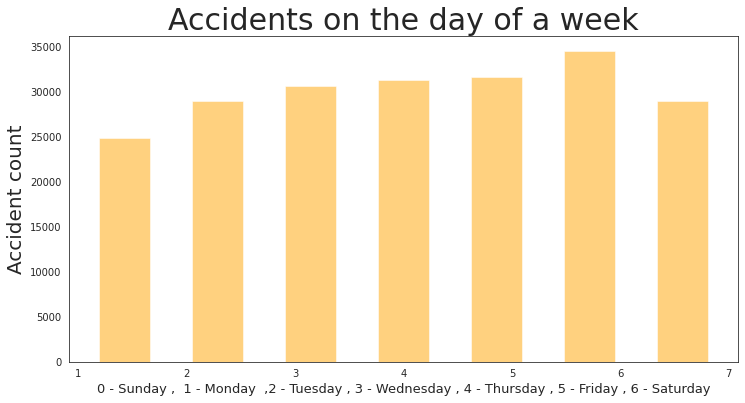

In [ ]:
plt.figure(figsize=(12,6))
df.Day_of_Week.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

In [ ]:
plt.figure(figsize=(12,6))
df.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

NameError: ignored

# ACCIDENT VS DAYTIME

In [ ]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [ ]:
# apply thus function to our temporary hour column
df['Daytime'] = df['Hour'].apply(when_was_it)
df[['Time', 'Hour', 'Daytime']].head(8)
# drop old time column and temporary hour column
#accidents = accidents.drop(columns=['Time', 'Hour'])

,Time,Hour,Daytime
0,17:50,17.0,afternoon rush (15-19)
1,17:50,17.0,afternoon rush (15-19)
2,17:50,17.0,afternoon rush (15-19)
3,17:50,17.0,afternoon rush (15-19)
4,17:50,17.0,afternoon rush (15-19)
5,17:50,17.0,afternoon rush (15-19)
6,21:45,21.0,evening (19-23)
7,21:45,21.0,evening (19-23)


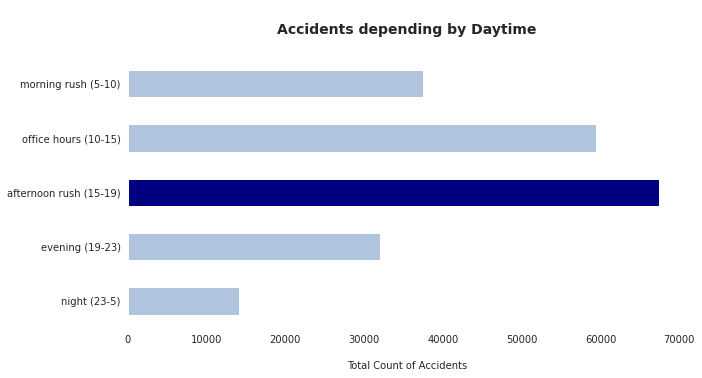

In [ ]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = df.groupby('Daytime').size().reindex(order)

# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue']

# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents depending by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nTotal Count of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

# ACIDENT SEVERITY BY DAYTIME

In [ ]:
# prepare dataframe with simple counts
counts = df.groupby(['Daytime', 'Accident_Severity']).size()

counts = counts.rename_axis(['Daytime', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts

Accident_Severity,fatal,serious,slight
Daytime,,,
afternoon rush (15-19),1400,13212,52849
evening (19-23),818,7147,24059
morning rush (5-10),561,7064,29797
night (23-5),456,3911,9777
office hours (10-15),1308,12035,46046


In [ ]:
# prepare dataframe with shares
counts['sum'] = counts.sum(axis=1)
counts = counts.join(counts.div(counts['sum'], axis=0), rsuffix=' in %')
counts_share = counts.drop(columns=['fatal', 'serious', 'slight', 'sum', 'sum in %'], axis=1)
counts_share

Accident_Severity,fatal in %,serious in %,slight in %
Daytime,,,
afternoon rush (15-19),0.020753,0.195846,0.783401
evening (19-23),0.025543,0.223176,0.751280
morning rush (5-10),0.014991,0.188766,0.796243
night (23-5),0.032240,0.276513,0.691247
office hours (10-15),0.022024,0.202647,0.775329


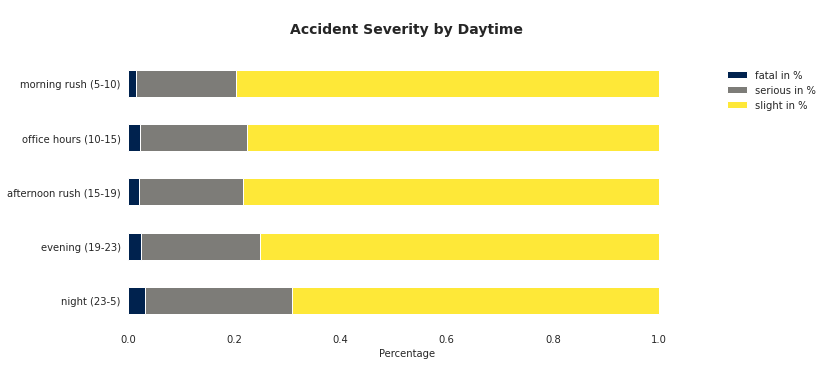

In [ ]:
# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))

# plot
counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

# ACCIDENTS & WEATHER CONDITIONS

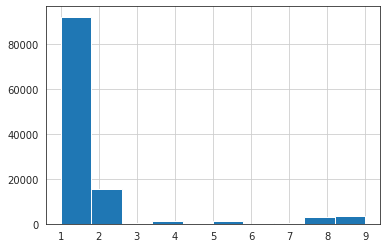

In [ ]:
accidentdata['Weather_Conditions'].hist()

# Accidents & vehicle types

In [ ]:
#ENGINE CAPACITY

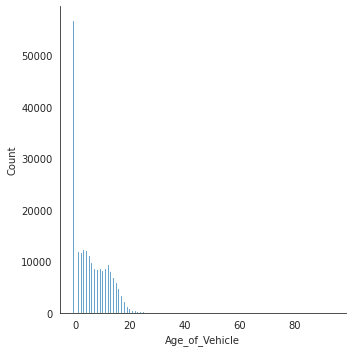

<Figure size 432x288 with 0 Axes>

In [ ]:
#AGE OF VEHICLES
sns.displot(df['Age_of_Vehicle']);
fig = plt.figure()

age of vehicle/ age of driver

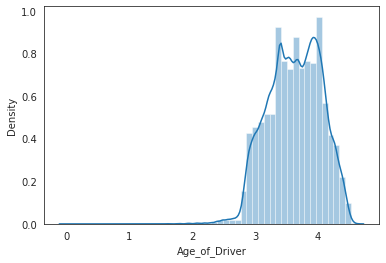

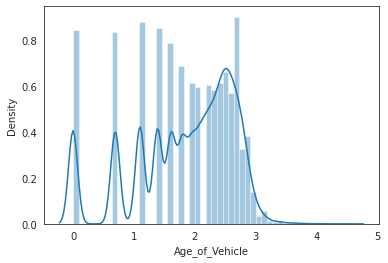

<Figure size 432x288 with 0 Axes>

In [ ]:
df['Age_of_Driver'] = np.log(df['Age_of_Driver'])
df['Age_of_Vehicle'] = np.log(df['Age_of_Vehicle'])
sns.distplot(df['Age_of_Driver']);
fig = plt.figure()
sns.distplot(df['Age_of_Vehicle']);
fig = plt.figure()

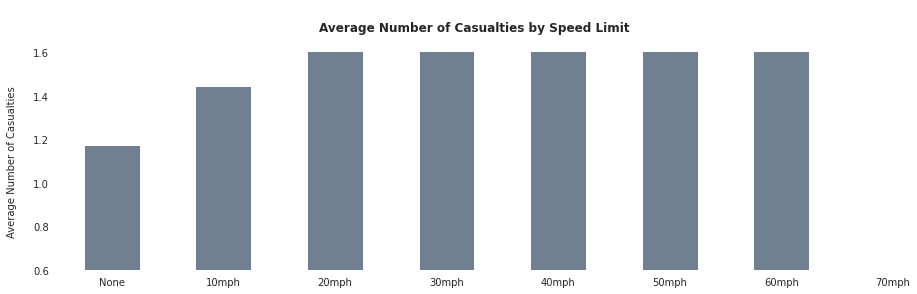

In [ ]:
# check speed limit
df.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(8), 
           ['None', '10mph', '20mph', '30mph', '40mph', '50mph', '60mph', '70mph'], 
           rotation='horizontal')
plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Speed Limit\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

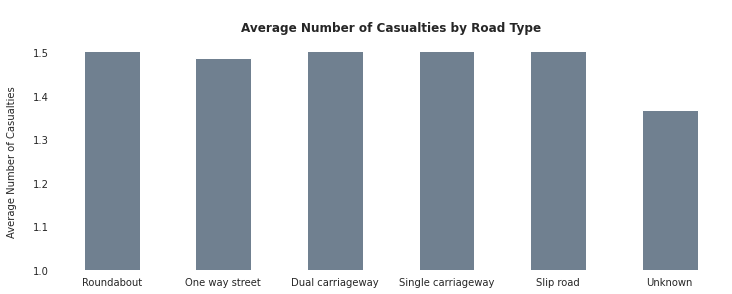

In [ ]:
# check road type
df.groupby('Road_Type')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                            figsize=(12,4), grid=False)
plt.xticks(np.arange(6), 
           ['Roundabout', 'One way street', 'Dual carriageway', 'Single carriageway', 'Slip road', 'Unknown'], 
           rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Road Type\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

# HYPOTHESIS TESTING
#	What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?
#	What impact, if any, does sunrise and sunset times have on road traffic accidents?

h0-  daylight savings has an impact on road accidents
h1- there is no impact of dalight saving on road accidents
h0-Sunrise and Sunset times impact on Road traffic accidents
h1-Sunrise and Sunset times do not impact on Road traffic accidents

In [ ]:
# df_chi = pd.read_csv('chi-test.csv')
# contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Shopping?"])
# print('contingency_table :-\n',contingency_table)
# #Observed Values
# Observed_Values = contingency_table.values 
# print("Observed Values :-\n",Observed_Values)
# b=stats.chi2_contingency(contingency_table)
# Expected_Values = b[3]
# print("Expected Values :-\n",Expected_Values)
# no_of_rows=len(contingency_table.iloc[0:2,0])
# no_of_columns=len(contingency_table.iloc[0,0:2])
# ddof=(no_of_rows-1)*(no_of_columns-1)
# print("Degree of Freedom:-",ddof)
# alpha = 0.05
# from scipy.stats import chi2
# chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
# chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)
# critical_value=chi2.ppf(q=1-alpha,df=ddof)
# print('critical_value:',critical_value)
# #p-value
# p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
# print('p-value:',p_value)
# print('Significance level: ',alpha)
# print('Degree of Freedom: ',ddof)
# print('chi-square statistic:',chi_square_statistic)
# print('critical_value:',critical_value)
# print('p-value:',p_value)
# if chi_square_statistic>=critical_value:
#     print("Reject H0,There is a relationship between 2 categorical variables")
# else:
#     print("Retain H0,There is no relationship between 2 categorical variables")
    
# if p_value<=alpha:
#     print("Reject H0,There is a relationship between 2 categorical variables")
# else:
#     print("Retain H0,There is no relationship between 2 categorical variables")

# CLUSTERING, FEATURE ENGINEERING & PCA
(f)	Are there particular types of vehicles (colour, makes, etc.) that are more frequently involved in road traffic accidents?
(g)	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?
(h)	How do alcohol or drugs (i.e., driving under the influence) affect road traffic accidents?

# Geograhic clustering using kmeans



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Use k-means on the geographic coordinates with the number of clusters = 25 and see what happens
cordinates = df[['Longitude','Latitude']]

In [ ]:
kmeans = KMeans(n_clusters= 25)
kmeans.fit(cordinates)

KMeans(n_clusters=25)

In [ ]:
labels = kmeans.predict(cordinates)

In [ ]:
centroids = kmeans.cluster_centers_

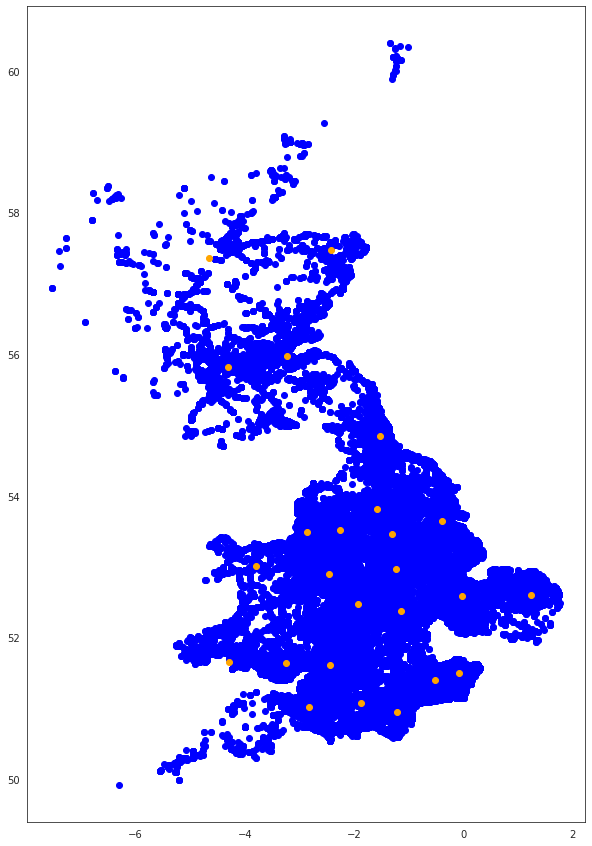

In [ ]:
fig = plt.figure(figsize = (10,15))
colors = map(lambda x: colmap[x+1],labels)
plt.scatter(cordinates['Longitude'], cordinates['Latitude'], color = 'blue')
#plt.xlim(-10, 10)
#plt.ylim(-10, 1500)
plt.scatter(centroids[:,0],centroids[:,1], color = 'orange')
plt.show()

In [ ]:
# we now get the inertia to get the right k 
kmeans.inertia_

18919.13183812167

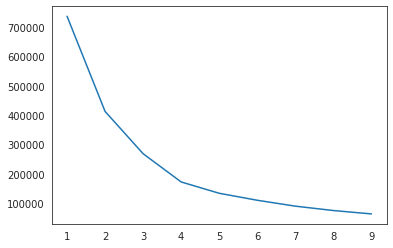

In [ ]:
# to get the optimal k, we check for the elbow
cluster_list = []

for i in range (1, 10):
  k_means = KMeans(n_clusters = i)
  k_means.fit(cordinates)
  cluster_list.append(k_means.inertia_)

plt.figure()
plt.plot(range(1,10), cluster_list)
plt.show()

In [ ]:
# using 4 clusters based on the elbow
kmeans = KMeans(n_clusters= 4)
kmeans.fit(cordinates)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.predict(cordinates)

In [ ]:
centroids = kmeans.cluster_centers_

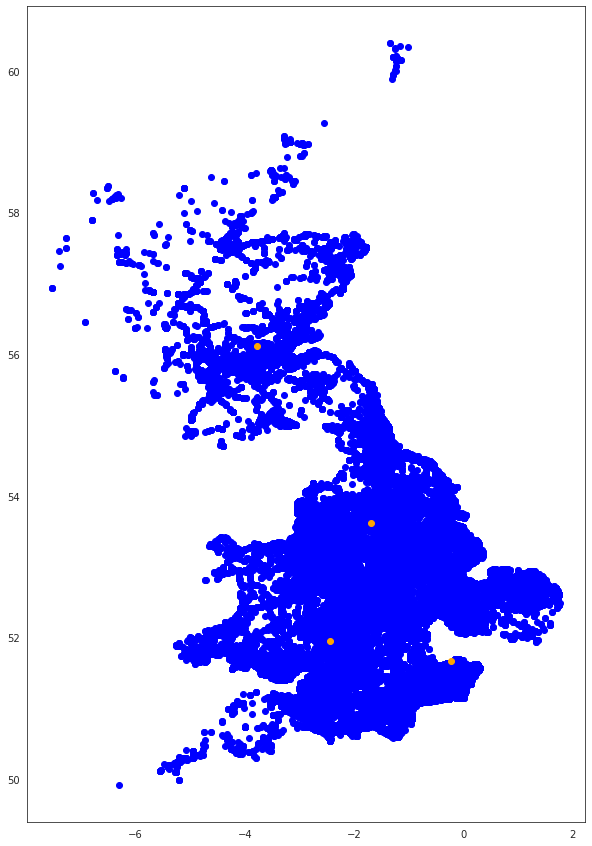

In [ ]:
fig = plt.figure(figsize = (10,15))
colors = map(lambda x: colmap[x+1],labels)
plt.scatter(cordinates['Longitude'], cordinates['Latitude'], color = 'blue')
#plt.xlim(-10, 10)
#plt.ylim(-10, 1500)
plt.scatter(centroids[:,0],centroids[:,1], color = 'orange')
plt.show()

# Clustering speed and weather

In [ ]:
speedandweather = df[['Speed_limit','Weather_Conditions']]

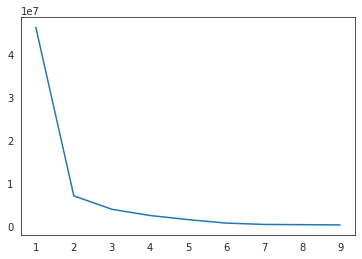

In [ ]:
# to get the optimal k, we check for the elbow
cluster_list = []

for i in range (1, 10):
  k_means = KMeans(n_clusters = i)
  k_means.fit(speedandweather)
  cluster_list.append(k_means.inertia_)

plt.figure()
plt.plot(range(1,10), cluster_list)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 2)
kmeans.fit(speedandweather)

KMeans(n_clusters=2)

In [ ]:
labels = kmeans.predict(speedandweather)

In [ ]:
centroids = kmeans.cluster_centers_

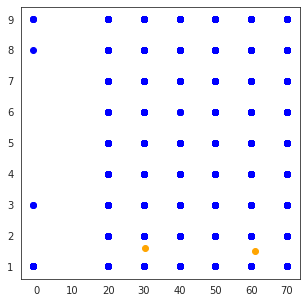

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = map(lambda x: colmap[x+1],labels)
plt.scatter(speedandweather['Speed_limit'], speedandweather['Weather_Conditions'], color = 'blue')
plt.xlim(0, 10)
plt.ylim(1, 9)
plt.scatter(centroids[:,0],centroids[:,1], color = 'orange')
plt.show()

# PRINCIPAL COMPONENT ANALYSIS

In [ ]:
usethis =df.dropna()#.reset_index(drop=True)
usethis

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,converted_time,decimal_time,Hour,Daytime
37,2019010155206,548535.0,188113.0,0.141957,51.572326,1,3,2,1,01/01/2019,...,1242,1,1.386294,-1,-1,-1,2022-04-25 01:15:00,1.250000,1.0,night (23-5)
43,2019010155210,537356.0,183448.0,-0.021065,51.533238,1,1,1,1,01/01/2019,...,2198,2,1.386294,-1,-1,-1,2022-04-25 03:00:00,3.000000,3.0,night (23-5)
46,2019010155217,543616.0,186274.0,0.070277,51.557075,1,2,2,1,01/01/2019,...,1499,1,0.000000,-1,-1,-1,2022-04-25 04:10:00,4.166667,4.0,night (23-5)
146,2019010155425,533271.0,186512.0,-0.078765,51.561751,1,3,1,1,02/01/2019,...,2996,1,0.000000,2,1,2,2022-04-25 15:07:00,15.116667,15.0,afternoon rush (15-19)
248,2019010155627,520571.0,179155.0,-0.264403,51.498486,1,2,2,1,03/01/2019,...,125,1,0.000000,-1,-1,-1,2022-04-25 18:45:00,18.750000,18.0,afternoon rush (15-19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210435,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,2198,2,1.386294,5,3,5,2022-04-25 08:46:00,8.766667,8.0,morning rush (5-10)
210436,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,1997,2,2.484907,3,2,3,2022-04-25 15:30:00,15.500000,15.0,afternoon rush (15-19)
210437,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,2967,2,1.609438,7,3,7,2022-04-25 15:30:00,15.500000,15.0,afternoon rush (15-19)
210438,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,1597,2,1.791759,8,3,8,2022-04-25 14:10:00,14.166667,14.0,office hours (10-15)


In [ ]:
features = usethis.drop(['Accident_Severity', 'Accident_Index','Date', 'Day_of_Week', 'Time','Local_Authority_(District)', 'Local_Authority_(Highway)','LSOA_of_Accident_Location','converted_time', 'decimal_time', 'Hour',
       'Daytime'], axis=1)
target = ['Accident_Severity']
features.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Reference_x', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile

In [ ]:
x =features.values# usethis.loc[:, features].values
y = usethis.loc[:, target].values

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, usethis[target]], axis = 1)
finalDf

,principal component 1,principal component 2,Accident_Severity
0,-162624.853890,-82818.300299,NaN
1,-164295.025333,-70824.260216,NaN
2,-163153.254689,-77596.434648,NaN
3,-160293.097452,-67652.606904,NaN
4,-164180.693489,-53497.367342,NaN
...,...,...,...
210435,NaN,NaN,3.0
210436,NaN,NaN,3.0
210437,NaN,NaN,3.0
210438,NaN,NaN,3.0


In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =1)
print("percent_variance=", percent_variance)

percent_variance= [81.8 18.1]


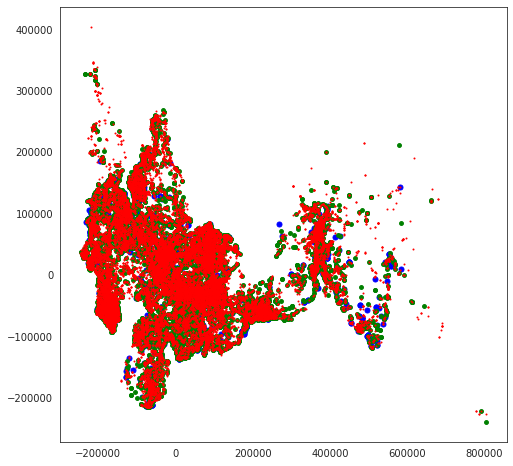

In [ ]:
one = finalDf[finalDf['Accident_Severity'] == 1]
two = finalDf[finalDf['Accident_Severity'] == 2]
three = finalDf[finalDf['Accident_Severity'] == 3]

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

ax1.scatter(one['principal component 1'], one['principal component 2'], color='blue', s=25)
ax1.scatter(two['principal component 1'], two['principal component 2'], color='green', s=15)
ax1.scatter(three['principal component 1'], three['principal component 2'], color='red', s=1)

#plt.xlim(-10.1, -9.75)
#plt.ylim(-7, 7)

plt.show()

# KMEANS ON PCA DATA

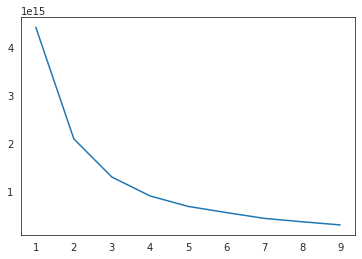

In [ ]:
cluster_list = []

for i in range (1, 10):
  k_means = KMeans(n_clusters = i)
  k_means.fit(principalDf)
  cluster_list.append(k_means.inertia_)

plt.figure()
plt.plot(range(1,10), cluster_list)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 2)
kmeans.fit(principalDf)

KMeans(n_clusters=2)

In [ ]:
labels = kmeans.predict(principalDf)

In [ ]:
centroids = kmeans.cluster_centers_

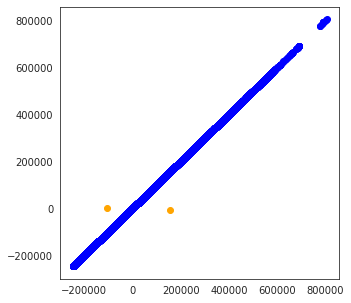

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = map(lambda x: colmap[x+1],labels)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 1'], color = 'blue')
#plt.xlim(0, 10)
#plt.ylim(-10, 80)
plt.scatter(centroids[:,0],centroids[:,1], color = 'orange')
plt.show()

# FEATURE SELECTION
which variables actually are the best at predicting fatalities within the accident database?

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

In [ ]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference_x',
       'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity',
       'Pedestrian_Location', 'Pedestrian_Movem

In [ ]:
#Expand the features that you are considering. Which ones at the top X (where X might be 4, 5, or so)?

predictors = ["Weather_Conditions", "Speed_limit", "Road_Surface_Conditions", "Light_Conditions", "Road_Type", "Urban_or_Rural_Area","Carriageway_Hazards", "Special_Conditions_at_Site",'Age_of_Driver','Journey_Purpose_of_Driver','Vehicle_Manoeuvre','Vehicle_Type','Sex_of_Driver','Engine_Capacity_(CC)', 'Age_of_Vehicle']

usethis = df.dropna()
usethis.reset_index(drop=True)

usethis = usethis.filter(['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 'Light_Conditions',
                          'Road_Type','Urban_or_Rural_Area','Carriageway_Hazards','Special_Conditions_at_Site','Age_of_Driver','Journey_Purpose_of_Driver','Vehicle_Manoeuvre','Vehicle_Type','Sex_of_Driver','Engine_Capacity_(CC)', 'Age_of_Vehicle','Accident_Severity'], axis=1)



usethisnow = usethis[(usethis['Weather_Conditions']>0) & (usethis['Speed_limit']>0) & (usethis['Road_Surface_Conditions']>0) & (usethis['Light_Conditions']>0)& (usethis['Road_Type']>0) & (usethis['Urban_or_Rural_Area']>0) & (usethis['Carriageway_Hazards']>0) & (usethis['Special_Conditions_at_Site']>0) & (usethis['Age_of_Driver']>0) & (usethis['Journey_Purpose_of_Driver']>0) & (usethis['Vehicle_Manoeuvre']>0) & (usethis['Vehicle_Type']>0) & (usethis['Sex_of_Driver']>0) & (usethis['Engine_Capacity_(CC)']>0) & (usethis['Age_of_Vehicle']>0)]

In [ ]:
y_target = usethisnow["Accident_Severity"].values
Xfeatures = usethisnow.drop("Accident_Severity", axis=1)


In [ ]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(usethisnow[predictors], usethisnow["Accident_Severity"])

SelectKBest(k='all')

In [ ]:
# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

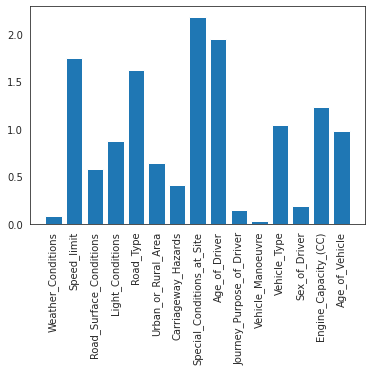

In [ ]:
# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# MODEL BUILDING & EVALUATION

(i)	Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models? 

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier(criterion="gini")
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['bayes'] = GaussianNB()
    models['svm'] = SVC()
    models['randomf'] = RandomForestClassifier(n_estimators=100)
    return models

In [ ]:
y_target = usethisnow["Accident_Severity"].values.ravel()
Xfeatures = usethisnow.drop("Accident_Severity", axis=1)

#The new bit is to use test-train split like so:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1)
    return X_train, y_train


# MODEL EVALUATION
How well do our models compare to government models? 

In [ ]:
def evaluate_model(model, X, y):
    cv=RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2) #n_repeats=4, random_state=2)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

#Grab hold of the dataset.
X, y = get_dataset()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
ax = sns.boxplot(data=results, labels=names,orient='v',showmeans=True)

NameError: ignored

In [ ]:
import sklearn

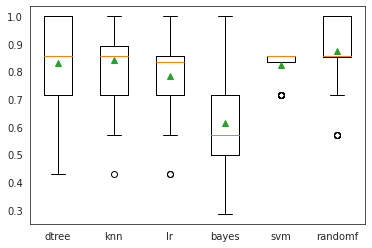

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# MODEL STACKING

In [ ]:
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level1 = LogisticRegression()
  model = StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
  return model
  StratifiedKFold(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier(criterion="gini")
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['bayes'] = GaussianNB()
    models['svm'] = SVC()
    models['randomf'] = RandomForestClassifier(n_estimators=100)
    models['stacking'] = get_stacking()
    return models

In [ ]:
def evaluate_model(model, X, y):
    cv=RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2) #n_repeats=4, random_state=2)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

#Grab hold of the dataset.
X, y = get_dataset()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
ax = sns.boxplot(data=results, labels=names,orient='v',showmeans=True)

In [ ]:
from sklearn.ensemble import StackingClassifier

def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('svm', SVC()))
    level0.append(('randomf', RandomForestClassifier()))
    
    level1 = LogisticRegression()
    model1 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model1



# PROBABILITIES

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1)

NameError: ignored

In [ ]:
decision_tree = DecisionTreeClassifier(criterion="gini") 

decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_validation)  
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, Y_pred))

Accuracy: 0.8043478260869565


In [ ]:
Y_pred_probability= decision_tree.predict_proba(X_validation)
mean(Y_pred_probability)


0.3333333333333333

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred2=clf.predict(X_validation)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred2))

Accuracy: 0.8913043478260869


In [ ]:
Y_pred2_probability= clf.predict_proba(X_validation)
mean(Y_pred2_probability)

0.3333333333333333

# REFERENCES

https://scikit-learn.org/stable/index.html, OFFICIAL SCIKIT-LEARN DOCUMENTATION, 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

https://seaborn.pydata.org/generated/seaborn.boxplot.html


https://stackoverflow.com/questions/48734388/valueerror-cannot-index-with-multidimensional-key